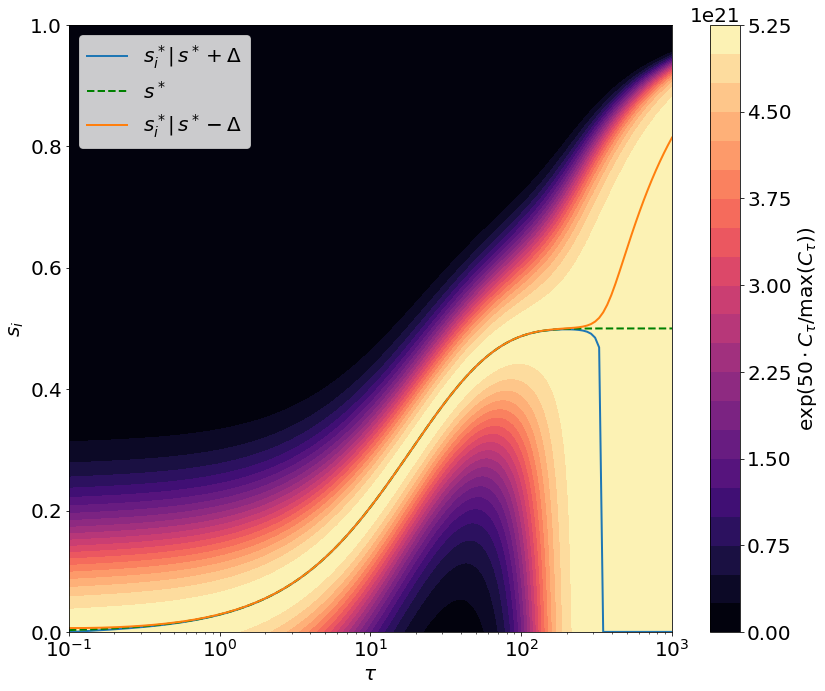

In [24]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from matplotlib import colors, ticker
from scipy.optimize import root, fsolve,brentq,minimize,fminbound
%matplotlib inline
import scipy.integrate as integrate
u = np.linspace(1e-9, 1, 200) # savings rate
taus = np.logspace(-1, 3, 150)  # tau
SS, T = np.meshgrid(u, taus)
plt.rc('font', size=20)

li= 1e-2
delta = 0.06
jo = 1e-5
def c_hat(s,tau):
    a = np.exp(-tau*1*delta/2)
    ss = ((a-1)/(a-2)) +jo 
    rr = delta/(2*ss)
    ww = ss/(2*delta)
    k0= (li)*ss*ss /(delta*delta)
    D = rr - delta/s
    
    A = (rr*k0 + ww*li*rr/D ) *np.exp(s*D*tau)
    B = ww*li*(1. - rr/D)
    return (1. - s)* (A+B)

def c_hat_neg(s):
    return -c_hat(s,tau)

Z=SS.copy()
for a,tau in enumerate(taus):
    for b, s in enumerate(u):
        Z[a,b]= c_hat(s,tau)
sroot=[]
for tau in taus:
    sroot.append(fminbound(c_hat_neg,1e-7,1., maxfun=150000,xtol=1e-19 ))
    
Z2 = Z.copy()/Z.max(1)[:,None]
Z2 = np.exp(50*Z2)

fig,ax = plt.subplots()
fig.set_size_inches((12,10))
#ax.semilogx(taus, sroot, label=r'$s_i^* | s^*$',lw=2)
ax.semilogx(taus, sroot, label=r'$s_i^* | \, s^*+ \Delta$',lw=2)



def c_hat(s,tau):
    a = np.exp(-tau*1*delta/2)
    ss = ((a-1)/(a-2)) - jo  
    rr = delta/(2*ss)
    ww = ss/(2*delta)
    k0= (li)*ss*ss /(delta*delta)
    D = rr - delta/s
    
    A = (rr*k0 + ww*li*rr/D ) *np.exp(s*D*tau)
    B = ww*li*(1. - rr/D)
    return (1. - s)* (A+B)

def c_hat_neg(s):
    return -c_hat(s,tau)

Z=SS.copy()
for a,tau in enumerate(taus):
    for b, s in enumerate(u):
        Z[a,b]= c_hat(s,tau)
sroot=[]
for tau in taus:
    sroot.append(fminbound(c_hat_neg,1e-7,1., maxfun=90000,xtol=1e-19 ))
Z3 = Z.copy() /Z.max(1)[:,None]
Z3 = np.exp(50*Z3)
Z3=0


c = ax.contourf(T,SS, Z2,20, cmap='magma')# norm=colors.LogNorm(vmin=Z.min(),vmax=Z.max()))
aa = np.exp(-taus*1*delta/2)
ax.semilogx(taus, (aa-1)/(aa-2), 'g--',lw=2,label=r'$s^*$')

ax.semilogx(taus, sroot, label=r'$s_i^* | \,s^*- \Delta$',lw=2)
plt.colorbar(c, label=r'$\mathrm{exp}(50 \cdot C_\tau/\mathrm{max}(C_\tau))$')
ax.legend(loc='upper left')
ax.set_ylabel(r'$s_i$')
ax.set_xlabel(r'$\tau$')
ax.set_aspect('auto')
ax.set_xscale('log')
fig.tight_layout()
fig.savefig('freerider_si_k0_001_1e-5_d0o06.pdf')